### DSF PROJECT - RANKING OF ACADEMIC PAPERS

In [ ]:
# Importing
import pandas as pd
import numpy as np
import json
from sklearn import preprocessing
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from nltk import word_tokenize
from collections import Counter
import random

In [55]:
# Loading data from json
f1 = open('dblp-ref/dblp-ref-0.json', 'r')
f2 = open('dblp-ref/dblp-ref-1.json', 'rb')
f3 = open('dblp-ref/dblp-ref-2.json', 'rb')
f4 = open('dblp-ref/dblp-ref-3.json', 'rb')

### Loading Data

In [56]:
# Reading file
l = f1.readlines()
l += f2.readlines()
l += f3.readlines()
l += f4.readlines()
swat = []
for line in l:
    swat.append(json.loads(line.strip().replace("\n","")))

In [57]:
df = pd.DataFrame(swat)

In [58]:
df.isnull().sum()

abstract      246354
authors            0
id                 0
n_citation         0
references    138520
title              0
venue              0
year               0
dtype: int64

In [59]:
df.head(10)

,abstract,authors,id,n_citation,references,title,venue,year
0,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",00127ee2-cb05-48ce-bc49-9de556b93346,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013
1,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",001c58d3-26ad-46b3-ab3a-c1e557d16821,50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011
2,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009
3,NaN,"[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",00338203-9eb3-40c5-9f31-cbac73a519ec,0,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...",Development of Remote Monitoring and Control D...,,2011
4,NaN,"[Giovanna Guerrini, Isabella Merlo]",0040b022-1472-4f70-a753-74832df65266,2,NaN,Reasonig about Set-Oriented Methods in Object ...,,1998
5,NaN,"[Rafael Álvarez, Leandro Tortosa, José-Francis...",005ce28f-ed77-4e97-afdc-a296137186a1,0,NaN,COMPARING GNG3D AND QUADRIC ERROR METRICS METH...,international conference on computer graphics ...,2009
6,NaN,"[Jovan Dj. Golic, Guglielmo Morgari]",00638a94-23bf-4fa6-b5ce-40d799c65da7,2,NaN,Vectorial fast correlation attacks.,,2004
7,NaN,"[Guzin Ulutas, Mustafa Ulutas, Vasif V. Nabiyev]",00701b05-684f-45f9-b281-425abfec482c,0,"[5626736c-e434-4e2d-8405-54940fab88ab, 8e87e87...",Improved Secret Image Sharing Method By Encodi...,international symposium on computer and inform...,2011
8,NaN,"[Pranay Chaudhuri, Hussein Thompson]",00745041-3636-4d18-bbec-783c4278c40d,0,NaN,A Self-Stabilizing Algorithm for Finding the C...,parallel and distributed processing techniques...,2003
9,NaN,"[Dominik Szajerman, Adam Jurczyński]",00964544-cbe2-4da9-bb5a-03333160eb34,0,"[3fcd7cdc-20e6-4ea3-a41c-db126fcc5cfe, bf3a11c...",Fur Visualisation for Computer Game Engines an...,international conference on computer vision an...,2014


In [60]:
df.n_citation.describe()

count    1000000.000000
mean          30.875730
std          137.942473
min            0.000000
25%            1.000000
50%            9.000000
75%           50.000000
max        73362.000000
Name: n_citation, dtype: float64

In [61]:
df1 = df.dropna()
df1 = df1.reset_index(drop=True)

In [62]:
def unique(s):
    seen = set()
    return [x for x in s if not (x in seen or seen.add(x))]

In [63]:
# Storing all paper ids in a list
ndf1 = df1
all_labels = list(ndf1.id[:])
print(len(all_labels))
all_refs = []
for idx, row in ndf1.iterrows():
    all_refs += list(row["references"])
    if idx%100000 == 0:
        print(idx, len(all_refs))
print(len(all_refs))
all_labels = list(unique(list(unique(all_labels))+list(unique(all_refs))))
dic1 = {}
count = 0
for i in all_labels:
    dic1[i] = count
    count = count + 1

709207
0 2
100000 956378
200000 1775530
300000 2594923
400000 3501980
500000 4440528
600000 5367473
700000 6293852
6379807


In [64]:
print(count)

1610077


In [65]:
df1.head()

,abstract,authors,id,n_citation,references,title,venue,year
0,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",00127ee2-cb05-48ce-bc49-9de556b93346,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013
1,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",001c58d3-26ad-46b3-ab3a-c1e557d16821,50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011
2,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009
3,Recent achievements in Natural Language Proces...,"[Ankita Brahmachari, Priya Singh, Avdhesh Garg...",00a119c4-d367-4607-b3c8-b237f2971bff,0,"[84d47128-58d0-4187-aa44-389fde7d5c83, e0dce69...",Identifying Psychological Theme Words from Emo...,,2013
4,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",00bcf2d5-1592-46b0-81fd-933f90b5ecca,50,[],Multisymplectic Spectral Methods for the Gross...,international conference on conceptual structures,2002


In [66]:
# Calculating inlinks, in_count, outlinks and out_count for each paper
references = list(df1["references"])
outlinks = []
out_count = []
for i in range(len(references)):
    outlinks.append(references[i])
    out_count.append(len(references[i]))
#print(outlinks[0])

size = len(dic1)
inlinks = [[] for i in range(size)]
in_count = [0] * size
for i in range(len(outlinks)):
    for j in range(len(outlinks[i])):
        in_count[dic1[outlinks[i][j]]] = in_count[dic1[outlinks[i][j]]] + 1
        inlinks[dic1[outlinks[i][j]]].append(i)
#print(in_count[100:200])

### Rank Papers Incount

In [67]:
# dictionary for incounts
dic_citations = {}
for i in range(len(references)):
    dic_citations[i] = 0

for i in range(len(references)):
    dic_citations[i] = dic_citations[i] + in_count[i]

In [68]:
for key in sorted(dic_citations, key=dic_citations.get, reverse=True)[:10]:
    print(key, dic_citations[key], in_count[key])
    print(df1.at[key, "title"])

227869 2140 2140
A Temporal Logic of Nested Calls and Returns
362104 1720 1720
Perceived usefulness, perceived ease of use, and user acceptance of information technology
669077 1517 1517
A method for obtaining digital signatures and public-key cryptosystems
640864 1168 1168
Data clustering: a review
295001 1064 1064
Differential Evolution – A Simple and Efficient Heuristic for Global Optimization over Continuous Spaces
506639 1063 1063
Time, clocks, and the ordering of events in a distributed system
541628 973 973
Term-weighting approaches in automatic text retrieval
338393 960 960
SURF: speeded up robust features
375195 936 936
Handlers of Algebraic Effects
337273 922 922
A density-based algorithm for discovering clusters in large spatial databases with noise


### Rank Papers Outcount

In [69]:
# dictionary for outcount
dic_outlinks = {}
for i in range(len(references)):
    dic_outlinks[i] = 0

for i in range(len(references)):
    dic_outlinks[i] = dic_outlinks[i] + out_count[i]

In [70]:
for key in sorted(dic_outlinks, key=dic_outlinks.get, reverse=True)[:10]:
    print(key, dic_outlinks[key], in_count[key])
    print(df1.at[key, "title"])

544683 630 1
Image analysis and computer vision: 1991
508669 478 8
Super-resolution: a comprehensive survey
679323 449 1
Picture processing: 1986
250542 386 1
Data-driven shape analysis and processing
571298 351 13
Informetrics at the beginning of the 21st century—A review
156372 306 28
Memory Systems: Cache, DRAM, Disk
581893 296 0
Spoken content retrieval: beyond cascading speech recognition with text retrieval
678110 294 6
Modern development methods and tools for embedded reconfigurable systems: A survey
174009 283 64
Transactional information systems: theory, algorithms, and the practice of concurrency control and recovery
79209 264 1
A review of the literature on citation impact indicators


### Topic Modelling Approach 2

In [77]:
cdf1 = df1[:100000]

In [ ]:
doc_complete = list(cdf1['abstract'])
doc_complete = [str(i) for i in doc_complete]
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]

In [79]:
seed_topic_list =  [["Face", "Recognition", "Video", "Expression", "Markov", "Information propagation", "Texture", "Synthesis", "dirichlet", "local feature", "alignment", "Boosted face detection", "BOW index", "category", "discovery","vision", "image deionising", "image histogram", "tone mapping", "retinex", "gamma correction", "affine transform", "homography", "hough", "radon", "image compression", "filter bank", "gabor filter", "visual perception", "visual system", "color", "palette", "contour detection", "edge detection", "edge linking", "harris corner detector", "projective geometry", "geometric hashing", "image pyramid", "image segmentation", "motion field", "motion vector", "optical flow", "particle filtering", "eigenface"],
 ["Memory", "synchronization", "concurrent", "virtual memory", "locks", "semaphore", "mutex", "page fault", "file system", "operating system", "virtual", "systems programming", "process", "thread", "file", "socket", "memory", "LRU", "EDF", "PCB", "Wait", "Round robin", "Process state", "Program counter"],
 ["Lan", "wan", "wireless", "network", "security", "adhoc", "sensor network", "routing", "protocol", "adaptive streaming", "multicasting", "data forwarding", "capacity plan", "load balancing", "traffic"],
 ["Turing machine", "church", "turing", "halting", "recursion theory", "theory", "time", "space", "complexity", "np complete", "probabilistic algorithm", "diagonalization", "adleman", "finite", "automata", "non-deterministic", "deterministic", "state", "np hard", "polynomial", "non-polynomial"],
 ["Kernel methods", "Nonparametric Bayesian methods", "Reinforcement learning", "Problem solving", "decisions", "games", "Symbolic algebra", "Collaborative filtering", "Information extraction", "Image search", "video search", "Intelligent information systems", "Parsing", "Machine translation", "Speech Recognition", "Context Modeling", "Dialog Systems", "Object Recognition", "Scene Understanding. Human Activity Recognition", "Machine learning", "decision tree", "SVM", "LSTM", "Bi-LSTM", "CNN", "RNN", "natural language processing"],
 ["Logic components", "Boolean algebra", "combinational logic", "synchronous", "asynchronous", "sequential logic", "digital subsystems", "computer organization", "computer design", "control structures", "communication", "memories", "processors", "I/O devices", "Processor design", "instruction set design", "addressing; control structure", "microprogramming", "memory management", "cache", "memory hierarchy", "interrupt", "I/O structure", "multi-computers and networks", "high performance machine", "special purpose processor", "data flow architecture", "circuit simulation", "system timing", "organizational and architectural consideration"],
 ["Sensory motor control", "Vision", "Audition", "Biomimetics", "Brain-machine interface", "Computational neuroscience", "computational biology", "Healthcare systems", "Physiological model", "Medical imaging", "bioimage analysis"],
 ["Coordination avoidance", "consistency", "monotonicity analysis", "transaction", "isolation levels", "protocols", "distributed analytics", "fault tolerance", "fault injection", "Hot storage", "cold storage", "indexing", "data skip", "version", "Data lineage", "usage track", "collective intelligence", "metadata representation", "Data processing", "homomorphic encryption", "data compression", "data encryption", "differential privacy", "database"]]

words = []
for i in doc_clean:
    for j in i:
        words.append(j)
        
for i in seed_topic_list:
    for j in i:
        words.append(j)

vocab = list(set(words))
word2id = dict((v, idx) for idx, v in enumerate(vocab))

In [80]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary(46716 unique tokens: ['captology', 'filterings', 'bdmst', '2point', 'experiences—from']...)
INFO:gensim.corpora.dictionary:adding document #20000 to Dictionary(73301 unique tokens: ['mashlets', 'conceptu', 'captology', 'filterings', 'bdmst']...)
INFO:gensim.corpora.dictionary:adding document #30000 to Dictionary(95356 unique tokens: ['nonprivate', 'intruder', 'rototranslation', 'evacuee', 'berechnet']...)
INFO:gensim.corpora.dictionary:adding document #40000 to Dictionary(115107 unique tokens: ['nonprivate', 'verycomplicated', 'intruder', 'kmservices', 'rototranslation']...)
INFO:gensim.corpora.dictionary:adding document #50000 to Dictionary(133415 unique tokens: ['nonprivate', 'verycomplicated', 'intruder', 'kmservices', 'rototranslation']...)
INFO:gensim.corpora.dictionary:adding document #60000 to Dictionary(150829 unique tokens: ['

In [81]:
#print(doc_term_matrix)
import guidedlda
tempo = []
max_temp = 0
for i in doc_term_matrix:
    tempi = []
    count = 0
    for j in i:
        if int(j[1]) == 0:
            count = count + 1
        tempi.append(int(j[1]))
    if count != len(doc_term_matrix[0]):
        if len(tempi) > max_temp:
            max_temp = len(tempi)
        tempo.append(tempi)

#for i in range(len(doc_term_matrix)):
#    for j in range(len(doc_term_matrix))
dtm = np.zeros(shape=(len(tempo), max_temp), dtype=int)
# import pdb;pdb.set_trace()
#print(tempo[14])
for i in range(len(tempo)):
    for j in range(len(tempo[i])):
        #print(i, j)
        dtm[i][j] = int(tempo[i][j])
    
#print(tempo[0])
#dtm = np.stack(tempo)
#dtm=np.array([xi for xi in tempo])
#dtm = np.array(tempo)
print(dtm[:10])
# print(type(dtm))
# print(type(dtm[0]))
#import pdb;pdb.set_trace()
seed_topic_list =  [["Face", "Recognition", "Video", "Expression", "Markov", "Information propagation", "Texture", "Synthesis", "dirichlet", "local feature", "alignment", "Boosted face detection", "BOW index", "category", "discovery","vision", "image deionising", "image histogram", "tone mapping", "retinex", "gamma correction", "affine transform", "homography", "hough", "radon", "image compression", "filter bank", "gabor filter", "visual perception", "visual system", "color", "palette", "contour detection", "edge detection", "edge linking", "harris corner detector", "projective geometry", "geometric hashing", "image pyramid", "image segmentation", "motion field", "motion vector", "optical flow", "particle filtering", "eigenface"],
 ["Memory", "synchronization", "concurrent", "virtual memory", "locks", "semaphore", "mutex", "page fault", "file system", "operating system", "virtual", "systems programming", "process", "thread", "file", "socket", "memory", "LRU", "EDF", "PCB", "Wait", "Round robin", "Process state", "Program counter"],
 ["Lan", "wan", "wireless", "network", "security", "adhoc", "sensor network", "routing", "protocol", "adaptive streaming", "multicasting", "data forwarding", "capacity plan", "load balancing", "traffic"],
 ["Turing machine", "church", "turing", "halting", "recursion theory", "theory", "time", "space", "complexity", "np complete", "probabilistic algorithm", "diagonalization", "adleman", "finite", "automata", "non-deterministic", "deterministic", "state", "np hard", "polynomial", "non-polynomial"],
 ["Kernel methods", "Nonparametric Bayesian methods", "Reinforcement learning", "Problem solving", "decisions", "games", "Symbolic algebra", "Collaborative filtering", "Information extraction", "Image search", "video search", "Intelligent information systems", "Parsing", "Machine translation", "Speech Recognition", "Context Modeling", "Dialog Systems", "Object Recognition", "Scene Understanding. Human Activity Recognition", "Machine learning", "decision tree", "SVM", "LSTM", "Bi-LSTM", "CNN", "RNN", "natural language processing"],
 ["Logic components", "Boolean algebra", "combinational logic", "synchronous", "asynchronous", "sequential logic", "digital subsystems", "computer organization", "computer design", "control structures", "communication", "memories", "processors", "I/O devices", "Processor design", "instruction set design", "addressing; control structure", "microprogramming", "memory management", "cache", "memory hierarchy", "interrupt", "I/O structure", "multi-computers and networks", "high performance machine", "special purpose processor", "data flow architecture", "circuit simulation", "system timing", "organizational and architectural consideration"],
 ["Sensory motor control", "Vision", "Audition", "Biomimetics", "Brain-machine interface", "Computational neuroscience", "computational biology", "Healthcare systems", "Physiological model", "Medical imaging", "bioimage analysis"],
 ["Coordination avoidance", "consistency", "monotonicity analysis", "transaction", "isolation levels", "protocols", "distributed analytics", "fault tolerance", "fault injection", "Hot storage", "cold storage", "indexing", "data skip", "version", "Data lineage", "usage track", "collective intelligence", "metadata representation", "Data processing", "homomorphic encryption", "data compression", "data encryption", "differential privacy", "database"]]

model = guidedlda.GuidedLDA(n_topics=8, n_iter=100, random_state=7, refresh=20)

seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
    for word in st:
        seed_topics[word2id[word]] = t_id

model.fit(dtm, seed_topics=seed_topics, seed_confidence=0.15)

n_top_words = 10
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

INFO:guidedlda:n_documents: 100000
INFO:guidedlda:vocab_size: 383
INFO:guidedlda:n_words: 8444102
INFO:guidedlda:n_topics: 8
INFO:guidedlda:n_iter: 100


[[1 1 2 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 [1 1 1 ..., 0 0 0]
 ..., 
 [3 4 1 ..., 0 0 0]
 [1 2 1 ..., 0 0 0]
 [3 4 1 ..., 0 0 0]]


INFO:guidedlda:<0> log likelihood: -59110658
INFO:guidedlda:<20> log likelihood: -40921401
INFO:guidedlda:<40> log likelihood: -39051655
INFO:guidedlda:<60> log likelihood: -38555198
INFO:guidedlda:<80> log likelihood: -38369545
INFO:guidedlda:<99> log likelihood: -38257554


Topic 0: fruct kmservices rototranslation languagerntheir ologkn intruder berechnet instantiated interessants warmstart
Topic 1: fruct boneh functionsdeceptive tinted kmservices kindergarten itemitem superactor period franchir
Topic 2: satisability 325psi kmservices swissprot fruct thecluster μagent germane coroutine aesgcm
Topic 3: fruct kmservices instantiated rototranslation dirichlettoneumann warmstart noveltyrecall chemostatlike intruder ologkn
Topic 4: instantiated fruct kmservices berechnet ologkn chemostatlike intruder dirichlettoneumann warmstart typereduced
Topic 5: intruder fruct kmservices rototranslation berechnet ologkn languagerntheir warmstart typereduced interessants
Topic 6: fruct kmservices rototranslation franchir kindergarten noveltyrecall instantiated functionsdeceptive dirichlettoneumann chemostatlike
Topic 7: developpons hmminduced vtlnwarping nondeterminisitic query sydneybased v241 declarativestyle mptsvm 0varphimathfrakcnxn


In [82]:
doc_topic = model.transform(dtm)
topic = []
for i in range(len(doc_topic)):
    topic.append(doc_topic[i].argmax())
    #print("top topic: {} Document: {}".format(doc_topic[i].argmax(),
    #                                              ', '.join(np.array(vocab)[list(reversed(dtm[i,:].argsort()))[0:5]])))
print(len(topic))

100000


In [72]:
for i in range(15,20):
    print(topic[i], list(cdf1['abstract'])[i])
list(cdf1['abstract'])[]

"Users of a digital book library system typically interact with the system to search for books by querying on the meta data describing the books or to search for information in the pages of a book by querying using one or more keywords. In either cases, a large volume of results are returned of which, the results relevant to the user are not often among the top few. Re-ranking of the search results according to the user's interest based on his relevance feedback, has received wide attention in information retrieval. Also, recent work in collaborative filtering and information retrieval has shown that sharing of search experiences among users having similar interests, typically called a community, reduces the effort put in by any given user in retrieving the exact information of interest. In this paper, we propose a collaborative filtering based re-ranking strategy for the search processes in a digital library system. Our approach is to learn a user profile representing user's interests

### Topic Modelling Approach 1

In [ ]:
# Topic Modelling using LDA
doc_complete = list(cdf1['abstract'])
doc_complete = [str(i) for i in doc_complete]
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]

In [289]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=5, id2word = dictionary, passes=50)
print(ldamodel.print_topics(num_topics=5, num_words=3))

[(0, '0.008*"network" + 0.006*"model" + 0.005*"performance"'), (1, '0.009*"problem" + 0.008*"system" + 0.007*"algorithm"'), (2, '0.011*"method" + 0.009*"algorithm" + 0.008*"data"'), (3, '0.014*"system" + 0.009*"paper" + 0.008*"model"'), (4, '0.013*"de" + 0.007*"system" + 0.005*"set"')]


In [ ]:
doc_all = list(df1['title'])
doc_all = [str(i) for i in doc_all]
apply_doc = [clean(doc).split() for doc in doc_all]
for doc in apply_doc:
    temp = dictionary.doc2bow(doc)
    print(ldamodel[temp])

### Topic Modelling Approach 3

In [ ]:
topics =  [["Face", "Recognition", "Video", "Expression", "Markov", "Information", "propagation", "Texture", "Synthesis", "dirichlet", "local", "feature", "alignment", "Boosted", "face", "detection", "BOW", "index", "category", "discovery","vision", "deionising", "image", "histogram", "tone", "mapping", "retinex", "gamma", "correction", "affine", "transform", "homography", "hough", "radon", "compression", "filter", "bank", "gabor", "visual", "perception", "visual", "system", "color", "palette", "contour", "detection", "edge", "detection", "edge", "linking", "harris", "corner", "detector", "projective", "geometry", "geometric", "hashing", "image", "pyramid", "image", "segmentation", "motion" ,"field", "motion", "vector", "optical", "flow", "particle", "filtering", "eigenface"],
 ["Memory", "synchronization", "concurrent", "virtual memory", "locks", "semaphore", "mutex", "page", "fault", "file", "system", "operating", "virtual", "systems", "programming", "thread", "file", "socket", "memory", "LRU", "EDF", "PCB", "Wait", "Round", "robin", "Process", "state", "Program", "counter"],
 ["Lan", "wan", "wireless", "network", "security", "adhoc", "sensor", "routing", "protocol", "adaptive", "streaming", "multicasting", "data", "forwarding", "capacity", "plan", "load", "balancing", "traffic"],
 ["Turing", "machine", "church", "halting", "recursion", "theory", "time", "space", "complexity", "np", "complete", "probabilistic", "algorithm", "diagonalization", "adleman", "finite", "automata", "non-deterministic", "deterministic", "state", "np", "hard", "polynomial", "non-polynomial"],
 ["Kernel", "Nonparametric", "Bayesian", "methods", "Reinforcement", "learning", "Problem", "solving", "decisions", "games", "Symbolic", "algebra", "supervised", "unsupervised", "corpus", "dataset", "train", "training", "clustering", "bayesian", "bayes", "recall", "precision", "Collaborative", "filtering", "Information", "extraction", "Image", "search", "video", "search", "Intelligent", "information", "systems", "Parsing", "Machine", "translation", "Speech", "Recognition", "Context", "Modeling", "Dialog", "Object", "Recognition", "Scene", "Understanding", "Human", "Activity", "Recognition", "Machine", "learning", "decision", "tree", "SVM", "LSTM", "Bi-LSTM", "CNN", "RNN", "natural", "language", "processing", "recursive"],
 ["Logic", "components", "Boolean", "algebra", "combinational", "synchronous", "asynchronous", "sequential", "digital", "subsystems", "computer", "organization", "computer", "design", "control", "structures", "communication", "memories", "processors", "I/O", "devices", "Processor", "design", "instruction", "set", "design", "addressing;", "control", "structure", "microprogramming", "memory", "management", "cache", "memory", "hierarchy", "interrupt", "I/O", "structure", "multi-computers", "networks", "high", "performance", "machine", "special", "purpose", "processor", "data", "flow", "architecture", "circuit", "simulation", "system", "timing", "organizational", "architectural", "consideration"],
 ["Sensory", "motor", "control", "Vision", "Audition", "Biomimetics", "Brain-machine", "interface", "Computational", "neuroscience", "computational", "biology", "Healthcare", "systems", "Physiological", "model", "Medical", "imaging", "bioimage", "analysis"],
 ["Coordination", "avoidance", "consistency", "monotonicity", "analysis", "transaction", "isolation", "levels", "protocols", "distributed", "analytics", "fault", "tolerance", "injection", "Hot", "storage", "cold", "storage", "indexing", "data", "skip", "version", "Data", "lineage", "usage", "track", "collective", "intelligence", "metadata", "representation", "Data", "processing", "homomorphic", "encryption", "compression","encryption", "differential", "privacy", "database", "no-sql", "sql", "query"]]

topic_names = ["CV", "OS", "CN", "TH", "AI", "CA", "CB", "DB"]

In [ ]:
results = []
for idx,row in df1.iterrows():
    tokens = word_tokenize(row['abstract'])
    decider = [0,0,0,0,0,0,0,0]
    for each in tokens:
        for t in range(len(topics)):
            try:
              if each in topics[t]:
                 decider[t] += 1
            except Exception as e:
              print t,e
    results.append(decider.index(max(decider)))

In [ ]:
df1['topic'] = pd.Series(results)
auth_topics = {}
len(auth_topics)
# print cdf['authors']
authors = df1['authors']
for idx in range(len(authors)):
    for auth in authors[idx]:
        if auth in auth_topics:
            auth_topics[auth].append(results[idx])
        else:
            auth_topics[auth] = [results[idx]]

auth_topic = {}
for auth in auth_topics.keys():
    auth_topic[auth] = max(dict(Counter(auth_topics[auth])).iteritems(), key= lambda x:x[1])[0]

In [ ]:
print auth_topics.keys()[10],auth_topic[auth_topics.keys()[10]], auth_topics[auth_topics.keys()[10]]

In [ ]:
df_auth_topics = []
for idx,row in fd.iterrows():
    if row['Author'] in auth_topic:
        df_auth_topics.append(auth_topic[row['Author']])
    else:
        df_auth_topics.append(random.randint(0,7))
        
papers_topic = {}
for idx,row in df1.iterrows():
    if row['id'] not in papers_topic:
        papers_topic[row['id']] = row['topic']
        
outlinks = {}
for idx,row in df1.iterrows():
    if row['id'] in outlinks:
        outlinks[row['id']] += row['references']
    else:
        outlinks[row['id']] = row['references']
        
inlinks = {}
for k in outlinks:
    for j in outlinks[k]:
        if j in inlinks:
            inlinks[j].append(k)
        else:
            inlinks[j] = [k]

### Page Rank Algorithm

In [71]:
# Page Rank Algorithm
new_rank1 = [1.0 for i in range(len(references))]
ids = df1['id']

while True:
    flag = True
    updated_page_rank = []
    for i in range(len(ids)):
        curr_score = new_rank1[i]
        temp = inlinks[i]
        new_score = 0.0
        for j in range(len(temp)):
            #print(out_count[j])
            if out_count[j] != 0:
                new_score = new_score + float(new_rank1[j]/out_count[j])
        new_score = 0.15 + 0.85*new_score
        
        if curr_score - new_score > 0.001:
            flag = False
        updated_page_rank.append(new_score)
        
    if flag == True:
        break
    
    new_rank1 = updated_page_rank
    print(new_rank1[:10])
max_score = max(new_rank1)
for i in range(len(ids)):
    new_rank1[i] = new_rank1[i]/max_score

print(new_rank1[:10])

[0.15, 0.15, 0.15, 0.15, 0.575, 0.575, 0.15, 2.4704636752136753, 0.15, 1.3487179487179486]
[0.15, 0.15, 0.15, 0.15, 0.21375, 0.21375, 0.15, 0.9100448623164584, 0.15, 0.32980769230769225]
[0.15, 0.15, 0.15, 0.15, 0.21375, 0.21375, 0.15, 0.5738730085123822, 0.15, 0.32980769230769225]
[0.15, 0.15, 0.15, 0.15, 0.21375, 0.21375, 0.15, 0.5624431654830436, 0.15, 0.32980769230769225]
[0.15, 0.15, 0.15, 0.15, 0.21375, 0.21375, 0.15, 0.5620545508200461, 0.15, 0.32980769230769225]
[0.15, 0.15, 0.15, 0.15, 0.21375, 0.21375, 0.15, 0.5620413379215041, 0.15, 0.32980769230769225]
[0.0018438105839200833, 0.0018438105839200833, 0.0018438105839200833, 0.0018438105839200833, 0.0026274300820861188, 0.0026274300820861188, 0.0018438105839200833, 0.006908651783068489, 0.0018438105839200833, 0.004054019424901209]


In [72]:
# page rank dictionary
dic2 = {}
for i in range(len(ids)):
    dic2[i] = new_rank1[i]
print(len(dic2))

709207


In [73]:
# Top 10 papers according to page rank
for key in sorted(dic2, key=dic2.get, reverse=True)[:10]:
    print(key, dic2[key], in_count[key])
    print(df1.at[key, "title"], df1.at[key, "year"])

227869 1.0 2140
A Temporal Logic of Nested Calls and Returns 2004
362104 0.8047922014718679 1720
Perceived usefulness, perceived ease of use, and user acceptance of information technology 1989
669077 0.7005422367634623 1517
A method for obtaining digital signatures and public-key cryptosystems 1978
640864 0.5231407829948256 1168
Data clustering: a review 1999
295001 0.47405932074570467 1064
Differential Evolution – A Simple and Efficient Heuristic for Global Optimization over Continuous Spaces 1997
506639 0.4735590098353371 1063
Time, clocks, and the ordering of events in a distributed system 1978
541628 0.4391271909318003 973
Term-weighting approaches in automatic text retrieval 1988
338393 0.4323202214752482 960
SURF: speeded up robust features 2006
375195 0.4165893317559203 936
Handlers of Algebraic Effects 2009
337273 0.412919396793403 922
A density-based algorithm for discovering clusters in large spatial databases with noise 1996


In [74]:
page_year = df1["year"]
min_year = min(page_year)
max_year = max(page_year)

In [75]:
print(min_year, max_year)

1954 2017


In [76]:
dic_year_dependent = {}
for i in range(min_year, max_year+1):
    dic_year_dependent[i] = 0
    
# Top 100 papers according to page rank year-wise
for key in sorted(dic2, key=dic2.get, reverse=True)[:100]:
    dic_year_dependent[page_year[key]] = dic_year_dependent[page_year[key]] + 1

In [77]:
# Paper count year-wise
count = 0
for i in range(len(page_year)):
    if page_year[i] > 2010:
        count = count + 1
print(count, len(page_year) - count)

295369 413838


In [78]:
# Year-wise papers and year-wise citations
dic_year_papers = {}
for i in range(min_year, max_year+1):
    dic_year_papers[i] = 0

dic_year_citations = {}
for i in range(min_year, max_year+1):
    dic_year_citations[i] = 0
    
for i in range(len(page_year)):
    dic_year_papers[page_year[i]] = dic_year_papers[page_year[i]] + 1
    dic_year_citations[page_year[i]] = dic_year_citations[page_year[i]] + in_count[i]

In [79]:
# Test year-wise papers
temp_count = 0
for key, value in dic_year_papers.items():
    if temp_count == 10:
        break
    print(key, value)
    temp_count = temp_count + 1

1954 1
1955 2
1956 0
1957 2
1958 4
1959 4
1960 11
1961 18
1962 14
1963 35


In [80]:
# Year-wise average citation per paper
dic_average_year_citations = {}
for i in range(min_year, max_year+1):
    dic_average_year_citations[i] = 0
    
for i in range(min_year, max_year+1):
    if dic_year_papers[page_year[i]] > 0:
        dic_average_year_citations[page_year[i]] = dic_average_year_citations[page_year[i]] + (dic_year_citations[page_year[i]]/dic_year_papers[page_year[i]])

### Modified Page Rank Algorithm

In [81]:
# Modified page-rank
new_rank2 = [1.0 for i in range(len(references))]
ids = df1['id']

while True:
    flag = True
    updated_page_rank = []
    for i in range(len(ids)):
        curr_score = new_rank2[i]
        temp = inlinks[i]
        new_score = 0.0
        for j in range(len(temp)):
            #print(out_count[j])
            if out_count[j] != 0:
                new_score = new_score + float(new_rank2[j]/out_count[j])
        if dic_average_year_citations[page_year[i]] > 0:
            new_score = 0.15 + 0.85*new_score/dic_average_year_citations[page_year[i]]
        else:
            new_score = 0.15 + 0.85*new_score
        if curr_score - new_score > 0.001:
            flag = False
        updated_page_rank.append(new_score)
        
    if flag == True:
        break
    
    new_rank2 = updated_page_rank
    print(new_rank2[:10])
max_score = max(new_rank2)
for i in range(len(ids)):
    new_rank2[i] = new_rank2[i]/max_score

print(new_rank2[:10])

[0.15, 0.15, 0.15, 0.15, 0.26729986476453116, 0.22173927524646947, 0.15, 0.6585191677619059, 0.15, 0.5378346178026123]
[0.15, 0.15, 0.15, 0.15, 0.16759497971467968, 0.1607608912869704, 0.15, 0.24557398210790232, 0.15, 0.20817519267039183]
[0.15, 0.15, 0.15, 0.15, 0.16759497971467968, 0.1607608912869704, 0.15, 0.22931606547467817, 0.15, 0.20817519267039183]
[0.15, 0.15, 0.15, 0.15, 0.16759497971467968, 0.1607608912869704, 0.15, 0.22919492860060336, 0.15, 0.20817519267039183]
[0.15, 0.15, 0.15, 0.15, 0.16759497971467968, 0.1607608912869704, 0.15, 0.229194026016183, 0.15, 0.20817519267039183]
[0.0027668166591404047, 0.0027668166591404047, 0.0027668166591404047, 0.0027668166591404047, 0.003091363879085826, 0.002965306081006995, 0.0027668166591404047, 0.0042275856623802295, 0.0027668166591404047, 0.003839883940668024]


In [82]:
# dictionary for modified page rank
dic2 = {}
for i in range(len(ids)):
    dic2[i] = new_rank2[i]
print(len(dic2))

709207


In [83]:
# Top 10 papers according to modified
for key in sorted(dic2, key=dic2.get, reverse=True)[:10]:
    print(key, dic2[key], in_count[key])
    print(df1.at[key, "title"], df1.at[key, "year"])

362104 1.0 1720
Perceived usefulness, perceived ease of use, and user acceptance of information technology 1989
669077 0.873873063886146 1517
A method for obtaining digital signatures and public-key cryptosystems 1978
295001 0.6025268781544912 1064
Differential Evolution – A Simple and Efficient Heuristic for Global Optimization over Continuous Spaces 1997
506639 0.6019544610804155 1063
Time, clocks, and the ordering of events in a distributed system 1978
340271 0.5619052494594043 202
Very Deep Convolutional Networks for Large-Scale Image Recognition 2015
541628 0.5562151041615677 973
Term-weighting approaches in automatic text retrieval 1988
337273 0.5228489282054964 922
A density-based algorithm for discovering clusters in large spatial databases with noise 1996
226690 0.5158520687182288 912
Computer architecture: a quantitative approach 1990
615205 0.4583712200782182 818
A Decision-Theoretic Generalization of On-Line Learning and an Application to Boosting 1997
227869 0.405712733234

In [84]:
dic_year_independent = {}
for i in range(min_year, max_year+1):
    dic_year_independent[i] = 0
    
# Top 100 papers according to page rank
for key in sorted(dic2, key=dic2.get, reverse=True)[:100]:
    dic_year_independent[page_year[key]] = dic_year_independent[page_year[key]] + 1

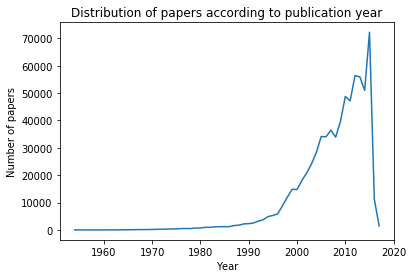

In [49]:
# Plot for Distribution of papers according to publication year
x = list(dic_year_papers.keys())
y = list(dic_year_papers.values())
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Number of papers')
plt.title('Distribution of papers according to publication year')
plt.savefig('year_distribution_papers.png', dpi=300, bbox_inches='tight')
plt.show()

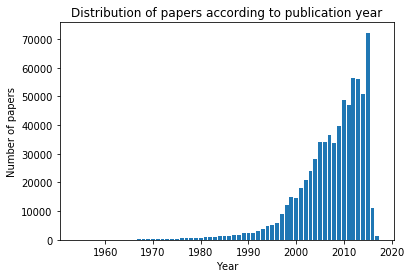

In [50]:
# Plot for Distribution of papers according to publication year
x = list(dic_year_papers.keys())
y = list(dic_year_papers.values())
plt.bar(x, y)
plt.xlabel('Year')
plt.ylabel('Number of papers')
plt.title('Distribution of papers according to publication year')
plt.savefig('year_distribution_papers_bar.png', dpi=300, bbox_inches='tight')
plt.show()

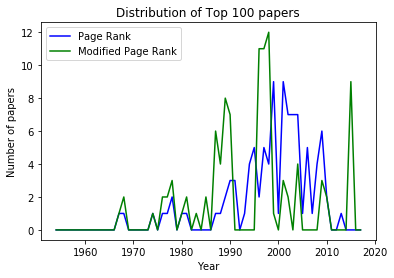

In [51]:
# Plot for Distribution of Top 100 papers
x1 = list(dic_year_dependent.keys())
y1 = list(dic_year_dependent.values())
x2 = list(dic_year_independent.keys())
y2 = list(dic_year_independent.values())

plt.plot(x1, y1, 'b', label = 'Page Rank')
plt.plot(x2, y2, 'g', label = 'Modified Page Rank')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Number of papers')
plt.title('Distribution of Top 100 papers')
plt.savefig('year_top100_papers.png', dpi=300, bbox_inches='tight')
plt.show()

### Conference Ranking

In [85]:
# unique conferences
conferences = df1.venue.unique()
print(conferences)

['international conference on human-computer interaction'
 'visual analytics science and technology'
 'pattern recognition and machine intelligence' ...,
 'Journal of Structural Biology'
 'Compel-the International Journal for Computation and Mathematics in Electrical and Electronic Engineering'
 'IEEE Journal of Selected Topics in Quantum Electronics']


In [86]:
# dictionary for paper ids, index published in a particular conference (modified page rank)
venue = df1["venue"]
ids = df1["id"]
dic_conferences = {}
dic_conferences_paper_index = {}

for i in range(len(conferences)):
    dic_conferences[conferences[i]] = []
    dic_conferences_paper_index[conferences[i]] = []

for i in range(len(new_rank2)):
    dic_conferences[venue[i]].append(ids[i])
    dic_conferences_paper_index[venue[i]].append(i)

In [87]:
# Calculation of conference scores based on average paper scores (modified page rank)
dic_conference_scores = {}
for i in range(len(conferences)):
    dic_conference_scores[conferences[i]] = 0

#conference_paper_scores = []
for i in range(len(conferences)):
    #conference_paper_scores[i] = sum(dic_conferences[conferences[i]])
    total = 0
    for j in dic_conferences_paper_index[conferences[i]]:
        total += new_rank2[j]
    dic_conference_scores[conferences[i]] = dic_conference_scores[conferences[i]] + total/len(dic_conferences[conferences[i]])

In [88]:
# Conference score test
temp_count = 0
for key, value in dic_conference_scores.items():
    if temp_count == 10:
        break
    print(key, value)
    temp_count = temp_count + 1

 0.0030448652471887633
Gem - International Journal on Geomathematics 0.0027668166591404047
Electronic Transactions on Artificial Intelligence 0.006562958258426119
Eurasip Journal on Audio, Speech, and Music Processing 0.003114452712980963
international conference on application of concurrency to system design 0.0033744199647656116
european conference on web services 0.0035458205992892366
Computers & Security 0.003526835795869433
Foundations of Computational Mathematics 0.00365039806861304
Mathematics of Computation 0.0034343826749216183
australian joint conference on artificial intelligence 0.003031671361120418


In [89]:
# dictionary for conference scores
max_conference_score = max(list(dic_conference_scores.values()))
for i in range(len(conferences)):
    dic_conference_scores[conferences[i]] = dic_conference_scores[conferences[i]]/max_conference_score

In [90]:
# Top 10 conferences
for key in sorted(dic_conference_scores, key=dic_conference_scores.get, reverse=True)[:10]:
    print(key, dic_conference_scores[key])

Physical Review X 1.0
Business Horizons 1.0
Advances in Computing Research 0.9959527254271898
Notices of the American Mathematical Society 0.977069450685588
international conference on learning representations 0.9507665748952754
Reviews of Modern Physics 0.9071505811812289
Annals of Statistics 0.8526344068273455
IEEE Transactions on Systems Science and Cybernetics 0.7038665218441773
ACM Transactions on Programming Languages and Systems 0.5338933350643277
Management Information Systems Quarterly 0.5303826057474125


In [91]:
# List of authors and their papers
authors = {}
df_authors = list(df1['authors'])

for i in range(len(df_authors)):
    auths = list(df_authors[i])
    for a in auths:
        if a in authors:
            authors[a].append(i)
        else:
            authors[a] = [i,]

In [92]:
author_names = list(authors.keys())
print(author_names[:10])

['Harald Paulitsch', 'Tuomas Virtanen', 'Diego Klabajan', 'Adin Cristian Andrei', 'Yingguo Hu', 'Donald F. Norris', 'John Abraham', 'Gabriella Pigozzi', 'Kwang Lee', 'Hanyu Li']


In [250]:
# Writing list of authors
import csv
with open('authors.csv', 'w', newline='', encoding='utf-8') as csvfile:
    spamwriter = csv.writer(csvfile)
    for i in range(len(author_names)):
        spamwriter.writerow([author_names[i]])

### Ranking Authors using modified page rank algorithm

In [93]:
# Scoring of authors (modified page rank)
author_score = {}
for i in range(len(author_names)):
    author_score[author_names[i]] = 0
    
for i in range(len(authors)):
    temp = list(authors[author_names[i]])
    total = 0
    for j in temp:
        total += new_rank2[j]*dic_conference_scores[venue[j]]
    author_score[author_names[i]] = total/len(temp)

In [94]:
# Normalize author scores
max_author_score = max(author_score.values())
for i in range(len(author_names)):
    author_score[author_names[i]] = author_score[author_names[i]]/max_author_score

In [95]:
# Top 10 authors according to modified page rank
for key in sorted(author_score, key=author_score.get, reverse=True)[:10]:
    print(key, author_score[key])

Bertram Raphael 1.0
Xu Xiaowei 0.5207162415475216
Fred D. Davis 0.4734770947719943
Peter E. Hart 0.33686285167590846
Thomas J. Mccabe 0.33613366719995286
Christopher Buckley 0.3337834800667581
Leonard M. Adleman 0.31230328666286794
Matija Pretnar 0.2993299493643762
Rainer Storn 0.2963866812996834
Jiirg Sander 0.26394425750512146


In [96]:
# Top 100 authors according to modified page rank
authors_mpr = []
for key in sorted(author_score, key=author_score.get, reverse=True)[:100]:
    authors_mpr.append(key)
print(len(authors_mpr))

100


In [255]:
import csv
with open('authors_mpr.csv', 'w', newline='', encoding='utf-8') as csvfile:
    spamwriter = csv.writer(csvfile)
    for i in range(len(authors_mpr)):
        spamwriter.writerow([authors_mpr[i]])

### Ranking authors based on different metrics

In [66]:
#rank authors based on sum citations count

#for each row update a dict of all the authors
#for each row, check the citations from the inlinks and update for the author
def top_authors_sum_citation(df, inlinks):
    authors_citations = []
    authors = {}
    df_authors = list(df['authors'])

    for i in range(len(df_authors)):
        auths = list(df_authors[i])
        for a in auths:
            if a in authors:
                authors[a] += inlinks[i]
            else:
                authors[a] = inlinks[i]
#     print authors
    for key in sorted(authors, key=authors.get, reverse=True)[:100]:
        #print(key, authors[key])
        authors_citations.append(key)
    return authors_citations

In [67]:
authors_citations = top_authors_sum_citation(df1, in_count)

In [258]:
# Top 100 authors according to citations
with open('authors_citations.csv', 'w', newline='', encoding='utf-8') as csvfile:
    spamwriter = csv.writer(csvfile)
    for i in range(len(authors_citations)):
        spamwriter.writerow([authors_citations[i]])

In [226]:
print(max(in_count))

4181


In [68]:
#rank authors based on number of papers
def top_authors_num_papers(df):
    authors_papers = []
    authors = {}
    df_authors = list(df['authors'])
    
    for i in range(len(df_authors)):
        auths = list(df_authors[i])
        for a in auths:
            if a in authors:
                authors[a] += 1
            else:
                authors[a] = 1
    for key in sorted(authors, key=authors.get, reverse=True)[:100]:
        #print(key, authors[key])
        authors_papers.append(key)
    return authors_papers

In [69]:
authors_papers = top_authors_num_papers(df1)

In [264]:
# Top 100 authors according to papers
with open('authors_papers.csv', 'w', newline='', encoding='utf-8') as csvfile:
    spamwriter = csv.writer(csvfile)
    for i in range(len(authors_papers)):
        spamwriter.writerow([authors_papers[i]])

In [70]:
# Top Authors based on h-index from our dataset
def top_authors_internal_h_index(df, inlinks):
    authors_h = []
    authors = {}
    df_authors = list(df['authors'])
    
    for i in range(len(df_authors)):
        auths = list(df_authors[i])
        for a in auths:
            if a in authors:
                authors[a].append(inlinks[i])
            else:
                authors[a] = [inlinks[i],]
    hindexes = {}
    for auth in authors.keys():
        hindexes[auth] = hIndex(authors[auth])
    for key in sorted(hindexes, key=hindexes.get, reverse=True)[:100]:
        #print(key, hindexes[key])
        authors_h.append(key)
    return authors_h

def hIndex(citations):
    n = len(citations)
    equal_h = [0] * (n+1)
    for h in range(n):
        if citations[h] >= n: equal_h[n] += 1
        else: equal_h[citations[h]] += 1
    s = 0
    for h in range(n,0, -1):
        s += equal_h[h]
        if s>=h:
            return h
    return 0

In [71]:
authors_h = top_authors_internal_h_index(df1, in_count)

In [271]:
# Top 100 authors according to h-index
with open('authors_h.csv', 'w', newline='', encoding='utf-8') as csvfile:
    spamwriter = csv.writer(csvfile)
    for i in range(len(authors_h)):
        spamwriter.writerow([authors_h[i]])

In [72]:
# Top Authors based on i10-index from our dataset
def top_authors_internal_i10_index(df, inlinks):
    authors_i = []
    i10_indexes = {}
    df_authors = list(df['authors'])
    
    for i in range(len(df_authors)):
        auths = list(df_authors[i])
        for a in auths:
            if a in i10_indexes:
                if inlinks[i] >= 10:
                    i10_indexes[a] += 1
            else:
                if inlinks[i] >= 10:
                    i10_indexes[a] = 1
                else:
                    i10_indexes[a] = 0
    for key in sorted(i10_indexes, key=i10_indexes.get, reverse=True)[:100]:
        #print(key, i10_indexes[key])
        authors_i.append(key)
    return authors_i

In [73]:
authors_i = top_authors_internal_i10_index(df1, in_count)

In [275]:
# Top 100 authors according to i10-index
with open('authors_i.csv', 'w', newline='', encoding='utf-8') as csvfile:
    spamwriter = csv.writer(csvfile)
    for i in range(len(authors_i)):
        spamwriter.writerow([authors_i[i]])

In [74]:
# Top Authors based on a-index from our dataset
# The a index is the average number of citations of an author's papers 
def top_authors_internal_a_index(df, inlinks):
    authors_a = []
    df_authors = list(df['authors'])
    authors = {}
    for i in range(len(df_authors)):
        auths = list(df_authors[i])
        for a in auths:
            if a in authors:
                authors[a].append(inlinks[i])
            else:
                authors[a] = [inlinks[i],]
    aindexes = {}
    for auth in authors.keys():
        aindexes[auth] = aIndex(authors[auth])
    for key in sorted(aindexes, key=aindexes.get, reverse=True)[:100]:
        #print(key, aindexes[key])
        authors_a.append(key)
    return authors_a

def aIndex(citations):
    if len(citations) > 0:
        return float(sum(citations))/len(citations)
    else:
        return 0

In [75]:
authors_a = top_authors_internal_a_index(df1, in_count)

In [278]:
# Top 100 authors according to a-index
with open('authors_a.csv', 'w', newline='', encoding='utf-8') as csvfile:
    spamwriter = csv.writer(csvfile)
    for i in range(len(authors_a)):
        spamwriter.writerow([authors_a[i]])

In [76]:
# Top Authors based on m-index from our dataset
# The m index is the median of citations of an author's papers 
def top_authors_internal_m_index(df, inlinks):
    df_authors = list(df['authors'])
    authors = {}
    for i in range(len(df_authors)):
        auths = list(df_authors[i])
        for a in auths:
            if a in authors:
                authors[a].append(inlinks[i])
            else:
                authors[a] = [inlinks[i],]
    mindexes = {}
    for auth in authors.keys():
        mindexes[auth] = mIndex(authors[auth])
    for key in sorted(mindexes, key=mindexes.get, reverse=True)[:10]:
        print(key, mindexes[key])

def mIndex(citations):
    if len(citations) > 0:
        return float(np.median(citations))
    else:
        return 0

In [223]:
top_authors_internal_m_index(df1, in_count)

Matija Pretnar 936.0
Xu Xiaowei 922.0
Peter Schwenzer 742.0
Mary Ann Marcinkiewicz 613.0
Bill Joy 584.0
James A. Gosling 584.0
Bertram Raphael 579.0
Rainer Storn 549.0
Christopher Buckley 486.5
Mark E. Smith 475.0


### Machine Learning

In [89]:
final_df = pd.DataFrame()

In [90]:
# Conference feature
f_conference = []
venue_name = df1['venue']
for i in range(len(references)):
    f_conference.append(dic_conference_scores[venue_name[i]])

In [91]:
print(len(f_conference))

709207


In [92]:
final_df['conference_score'] = f_conference

In [93]:
# Number of references feature
f_outcount = out_count
final_df['number_of_references'] = f_outcount

In [94]:
# Paper age feature
paper_year = df1['year']
f_age = []
for i in range(len(references)):
    f_age.append(2017 - paper_year[i])

In [95]:
final_df['age'] = f_age

In [106]:
paper_authors = df1['authors']
author_names = list(authors.keys())

In [107]:
print(len(author_names))

720917


In [143]:
# Top Authors based on h-index from our dataset
def top_authors_internal_h_index(df, inlinks):
    authors_h = []
    authors = {}
    df_authors = list(df['authors'])
    
    for i in range(len(df_authors)):
        auths = list(df_authors[i])
        for a in auths:
            if a in authors:
                authors[a].append(inlinks[i])
            else:
                authors[a] = [inlinks[i],]
    hindexes = {}
    for auth in authors.keys():
        hindexes[auth] = hIndex(authors[auth])
    for key in sorted(hindexes, key=hindexes.get, reverse=True):
        #print(key, hindexes[key])
        authors_h.append(hindexes[key])
    return authors_h

def hIndex(citations):
    n = len(citations)
    equal_h = [0] * (n+1)
    for h in range(n):
        if citations[h] >= n: equal_h[n] += 1
        else: equal_h[citations[h]] += 1
    s = 0
    for h in range(n,0, -1):
        s += equal_h[h]
        if s>=h:
            return h
    return 0

In [144]:
authors_h = top_authors_internal_h_index(df1, in_count)

In [145]:
print(len(authors_h))

720917


In [146]:
# author h-index dictionary
dic_author_h = {}
for i in range(len(author_names)):
    dic_author_h[author_names[i]] = authors_h[i]

In [148]:
f_h_index = []
for i in range(len(paper_authors)):
    h_sum = 0
    h_avg = 0
    count = 0
    for j in range(len(paper_authors[i])):
        try:
            h_sum = h_sum + dic_author_h[paper_authors[i][j]]
            count = count + 1
        except:
            print(count)
            continue
    if count != 0:
        h_avg = h_sum/count
    f_h_index.append(h_avg)

In [149]:
print(f_h_index[:100])

[0.625, 1.0, 0.25, 1.5, 0.0, 0.0, 1.6666666666666667, 2.5, 0.0, 1.3333333333333333, 1.0, 2.0, 1.0, 0.5, 0.5, 0.0, 0.75, 0.5, 2.0, 0.6666666666666666, 0.0, 0.3333333333333333, 1.0, 0.3333333333333333, 0.25, 1.6666666666666667, 0.0, 0.0, 0.4, 0.0, 0.5, 0.0, 0.75, 0.0, 0.6666666666666666, 1.0, 0.4, 1.5, 0.0, 1.25, 0.3333333333333333, 0.3333333333333333, 1.5, 1.0, 1.0, 0.5, 1.0, 0.6, 0.75, 0.0, 0.25, 0.3333333333333333, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.5, 1.0, 0.0, 0.5, 1.25, 2.0, 1.0, 0.5, 0.5, 0.2, 1.0, 0.0, 0.6666666666666666, 0.3333333333333333, 3.0, 0.5, 1.0, 0.25, 0.5, 1.0, 0.8, 0.0, 0.75, 1.25, 0.5, 2.0, 0.0, 0.0, 0.0, 1.0, 0.5, 2.3333333333333335, 1.75, 0.0, 1.0, 0.8, 0.0, 0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666]


In [159]:
final_df['h_index'] = f_h_index

In [150]:
# Top Authors based on i10-index from our dataset
def top_authors_internal_i10_index(df, inlinks):
    authors_i = []
    i10_indexes = {}
    df_authors = list(df['authors'])
    
    for i in range(len(df_authors)):
        auths = list(df_authors[i])
        for a in auths:
            if a in i10_indexes:
                if inlinks[i] >= 10:
                    i10_indexes[a] += 1
            else:
                if inlinks[i] >= 10:
                    i10_indexes[a] = 1
                else:
                    i10_indexes[a] = 0
    for key in sorted(i10_indexes, key=i10_indexes.get, reverse=True):
        #print(key, i10_indexes[key])
        authors_i.append(i10_indexes[key])
    return authors_i

In [151]:
authors_i = top_authors_internal_i10_index(df1, in_count)

In [152]:
# author i-index dictionary
dic_author_i = {}
for i in range(len(author_names)):
    dic_author_i[author_names[i]] = authors_i[i]

In [153]:
f_i_index = []
for i in range(len(paper_authors)):
    i_sum = 0
    i_avg = 0
    count = 0
    for j in range(len(paper_authors[i])):
        try:
            i_sum = i_sum + dic_author_i[paper_authors[i][j]]
            count = count + 1
        except:
            continue
    if count != 0:
        i_avg = i_sum/count
    f_i_index.append(i_avg)

In [154]:
final_df['i_index'] = f_i_index

In [155]:
f_author_rank = []
for i in range(len(paper_authors)):
    rank_sum = 0
    rank_avg = 0
    count = 0
    for j in range(len(paper_authors[i])):
        try:
            rank_sum = rank_sum + author_score[paper_authors[i][j]]
            count = count + 1
        except:
            continue
    if count != 0:
        rank_avg = rank_sum/count
    f_author_rank.append(rank_avg)

In [156]:
final_df['author_rank'] = f_author_rank

In [157]:
# Modified page rank used as y (target)
f_rank = new_rank2
final_df['rank'] = f_rank

In [98]:
df_topic = pd.read_csv('topics.csv', sep='\t', encoding='utf-8')

In [99]:
df_topic.head()

,Unnamed: 0,abstract,authors,id,n_citation,references,title,venue,year,topic
0,0,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",00127ee2-cb05-48ce-bc49-9de556b93346,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,4
1,1,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",001c58d3-26ad-46b3-ab3a-c1e557d16821,50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011,5
2,2,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,4
3,3,Recent achievements in Natural Language Proces...,"[Ankita Brahmachari, Priya Singh, Avdhesh Garg...",00a119c4-d367-4607-b3c8-b237f2971bff,0,"[84d47128-58d0-4187-aa44-389fde7d5c83, e0dce69...",Identifying Psychological Theme Words from Emo...,NaN,2013,0
4,4,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",00bcf2d5-1592-46b0-81fd-933f90b5ecca,50,[],Multisymplectic Spectral Methods for the Gross...,international conference on conceptual structures,2002,1


In [100]:
f_topic = df_topic['topic']

In [168]:
final_df['topic'] = f_topic

In [177]:
import lightgbm as lgb
from sklearn import model_selection, preprocessing, metrics
from sklearn.model_selection import train_test_split

cols = ['conference_score', 'number_of_references','age','h_index','i_index','author_rank','topic']
X = final_df[cols]
Y = final_df['rank']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
model_lgb = lgb.LGBMRegressor(objective='regression', njobs=7, n_estimators=100, learning_rate=0.03, sub_sample=0.75, max_depth=6)
model_lgb.fit(X_train, Y_train)
predictions = model_lgb.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(predictions, Y_test))
print(rmse)

0.00256080940744


In [178]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, Y_train)
predictions = model_rf.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(predictions, Y_test))
print(rmse)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.0025351782047


In [182]:
ml = []
for index, row in final_df.iterrows():
    if row['topic'] == 4:
        ml.append(list(row))

In [183]:
print(ml[:10])

[[0.15103410865294453, 2.0, 4.0, 0.625, 0.0, 0.0019501374631899907, 0.0027668166591404047, 4.0], [0.14761382918904245, 2.0, 8.0, 0.25, 0.0, 0.0018946732806625279, 0.0027668166591404047, 4.0], [0.15558850350441017, 13.0, 13.0, 1.3333333333333333, 0.33333333333333331, 0.0025361032101546828, 0.003839883940668024, 4.0], [0.14531792118239559, 7.0, 4.0, 0.33333333333333331, 0.0, 0.0023223274461033855, 0.0027668166591404047, 4.0], [0.15558850350441017, 7.0, 6.0, 0.0, 0.0, 0.0042388531742386954, 0.0028504108855984143, 4.0], [0.15558850350441017, 7.0, 4.0, 0.5, 0.0, 0.0024364885304510799, 0.0027668166591404047, 4.0], [0.17610034043609588, 18.0, 3.0, 0.75, 0.25, 0.00244449768476904, 0.003560204442947443, 4.0], [0.14905488749115597, 9.0, 5.0, 0.66666666666666663, 0.33333333333333331, 0.0021386483134695042, 0.0030006748145351677, 4.0], [0.15558850350441017, 3.0, 9.0, 0.40000000000000002, 0.0, 0.0019735627513947761, 0.0027668166591404047, 4.0], [0.15216747822618293, 11.0, 3.0, 1.5, 0.25, 0.00233697

### Time Series Analysis

In [101]:
df1['topic'] = f_topic

In [102]:
df1.head()

,abstract,authors,id,n_citation,references,title,venue,year,topic
0,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",00127ee2-cb05-48ce-bc49-9de556b93346,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,4
1,This paper describes the design and implementa...,"[Gareth Beale, Graeme Earl]",001c58d3-26ad-46b3-ab3a-c1e557d16821,50,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...",A methodology for the physically accurate visu...,visual analytics science and technology,2011,5
2,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,4
3,Recent achievements in Natural Language Proces...,"[Ankita Brahmachari, Priya Singh, Avdhesh Garg...",00a119c4-d367-4607-b3c8-b237f2971bff,0,"[84d47128-58d0-4187-aa44-389fde7d5c83, e0dce69...",Identifying Psychological Theme Words from Emo...,,2013,0
4,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",00bcf2d5-1592-46b0-81fd-933f90b5ecca,50,[],Multisymplectic Spectral Methods for the Gross...,international conference on conceptual structures,2002,1


In [104]:
df2 = df1[df1['topic'] == 4]

In [105]:
df2.head()

,abstract,authors,id,n_citation,references,title,venue,year,topic
0,The purpose of this study is to develop a lear...,"[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",00127ee2-cb05-48ce-bc49-9de556b93346,0,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...",Preliminary Design of a Network Protocol Learn...,international conference on human-computer int...,2013,4
2,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,4
9,Previous language modeling approaches to infor...,"[Carmen Fernández-Daza Álvarez, Philippe Langl...",012b88ae-a763-45d6-8f19-2ec9ff739d5f,50,"[00515e82-3da6-497a-83d3-459e93247123, 0cd820e...",Word pairs in language modeling for informatio...,,2004,4
23,"In recent years, several advanced methods for ...","[Qingxiao Guan, Jing Dong, Tieniu Tan]",0440e3ec-6f52-4cd4-8d97-bc25440a233e,1,"[24f4d12f-46d3-48c3-873f-353c99b0f939, 7cf849c...",Two notes from experimental study on image ste...,international conference on intelligent computing,2013,4
29,Entailment pairs are sentence pairs of a premi...,"[Manaal Faruqui, Sebastian Padó]",05e535a9-2021-4393-a19e-6a0277034323,3,"[484d1994-e9da-477d-9be2-1f1e154cd919, 68453f2...",Acquiring entailment pairs across languages an...,,2011,4


In [106]:
paper_index = []
for index, row in df2.iterrows():
    paper_index.append(index)

In [107]:
print(len(paper_index))

111872


In [108]:
year = df1['year']
paper_ids = df1['id']
dic_paper_year = {}
for i in range(len(paper_index)):
    dic_paper_year[paper_index[i]] = year[paper_index[i]]

In [109]:
temp_count = 0
for key, value in dic_paper_year.items():
    if temp_count == 10:
        break
    print(key, value)
    temp_count = temp_count + 1

0 2013
2 2009
262151 2007
9 2004
262146 2003
262159 2004
262162 1999
567982 2012
23 2013
262172 2013


In [110]:
dic_paper_outcount = {}
for i in range(len(paper_index)):
    dic_paper_outcount[paper_index[i]] = out_count[paper_index[i]]

In [111]:
dic_year_score = {}
for i in range(min_year, max_year+1):
    dic_year_score[i] = 0
    
dic_year_count = {}
for i in range(min_year, max_year+1):
    dic_year_count[i] = 0

In [112]:
for i in range(len(paper_index)):
    paper_inlinks = inlinks[paper_index[i]]
    #print(paper_inlinks)
    for j in paper_inlinks:
        try:
            dic_year_count[dic_paper_year[j]] = dic_year_count[dic_paper_year[j]] + 1
            dic_year_score[dic_paper_year[j]] = dic_year_score[dic_paper_year[j]] + new_rank2[paper_index[j]]/dic_paper_outcount[j]
        except:
            continue

In [113]:
year_x = []
score_y = []
temp = 0
for i in range(min_year, max_year+1):
    if dic_year_count[i] != 0:
        year_x.append(i)
        temp = temp + dic_year_score[i]
        score_y.append(temp)

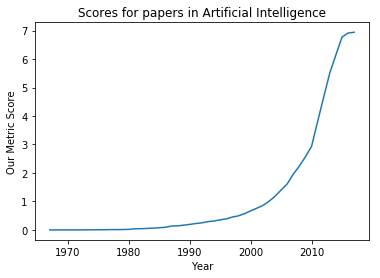

In [114]:
plt.plot(year_x, score_y)
plt.title('Scores for papers in Artificial Intelligence')
plt.xlabel('Year')
plt.ylabel('Our Metric Score')
#plt.savefig('time_AI.png', dpi=300, bbox_inches='tight')
plt.show()

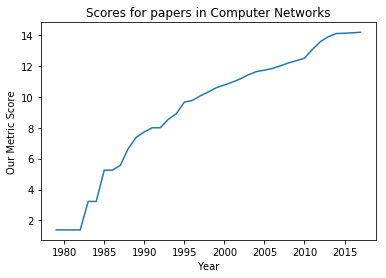

In [125]:
df3 = df1[df1['topic'] == 2]
paper_index = []
for index, row in df3.iterrows():
    paper_index.append(index)

year = df1['year']
paper_ids = df1['id']
dic_paper_year = {}
for i in range(len(paper_index)):
    dic_paper_year[paper_index[i]] = year[paper_index[i]]

dic_paper_outcount = {}
for i in range(len(paper_index)):
    dic_paper_outcount[paper_index[i]] = out_count[paper_index[i]]
    
dic_year_score = {}
for i in range(min_year, max_year+1):
    dic_year_score[i] = 0
    
dic_year_count = {}
for i in range(min_year, max_year+1):
    dic_year_count[i] = 0
    
for i in range(len(paper_index)):
    paper_inlinks = inlinks[paper_index[i]]
    #print(paper_inlinks)
    for j in paper_inlinks:
        try:
            dic_year_count[dic_paper_year[j]] = dic_year_count[dic_paper_year[j]] + 1
            dic_year_score[dic_paper_year[j]] = dic_year_score[dic_paper_year[j]] + new_rank2[paper_index[j]]/dic_paper_outcount[j]
        except:
            continue

year_x = []
score_y = []
temp = 0
for i in range(min_year, max_year+1):
    if dic_year_count[i] != 0:
        year_x.append(i)
        temp = temp + dic_year_score[i]/dic_year_count[i]
        score_y.append(temp)

plt.plot(year_x, score_y)
plt.title('Scores for papers in Computer Networks')
plt.xlabel('Year')
plt.ylabel('Our Metric Score')
plt.savefig('time_CN.png', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
topic_df = pd.read_csv('with_ranks_topic.csv', sep='\t', encoding='utf-8')

In [43]:
topic_0.head()

,Unnamed: 0,Author,Cum_Page_Rank,num_citation,centrality,hindex,Metric_Rank,Citation_Rank,Centrality_Rank,hindex_Rank,Topic
0,12,Mohammed Nasser,2.484419e-07,122,0.000009,4,449727,363490,374027.0,269846,0
1,17,Sun-Young Kim,5.347252e-08,0,0.000000,0,1043609,1593081,973324.5,1593081,0
2,27,Guzin Ulutas,8.838949e-07,284,0.000007,7,176233,190043,424886.5,144746,0
3,28,Mustafa Ulutas,1.134947e-06,379,0.000014,8,143183,148838,304072.5,123186,0
4,29,Vasif V. Nabiyev,1.506929e-06,449,0.000017,10,111847,128183,271163.5,93057,0


In [34]:
topic_0 = topic_df.loc[topic_df['Topic'] == 0]

In [36]:
topic_0 = topic_0.reset_index(drop=True)

In [39]:
citations = list(topic_0['num_citation'])
citations.sort(reverse=True)

In [51]:
len(topic_0['num_citation'])

313313

In [ ]:
local_rank_0 = []
for index, row in topic_0.iteritems():
    local_rank_0.append(citations.index(row['num_citation']))

In [19]:
y_count = topic_df.Topic.value_counts(sort=False)
x_1 = [0,1,2,3,4,5,6,7] 

In [52]:
y_count

0    313313
1    138919
2    175695
3    169266
4    233771
5    471712
6    133461
7    130410
Name: Topic, dtype: int64

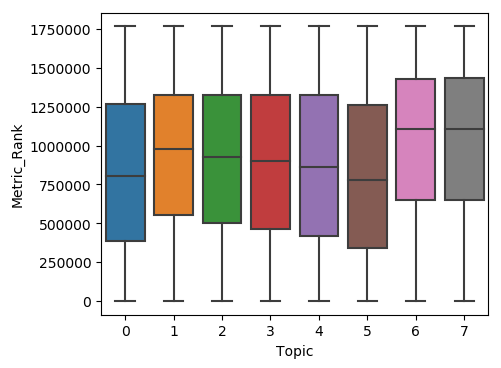

In [21]:
fig=plt.figure(figsize=(5, 4), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.boxplot(x="Topic", y="Metric_Rank", data=topic_df)
#plt.savefig('mpr_internal_h-index.png',bbox_inches='tight')
plt.show()

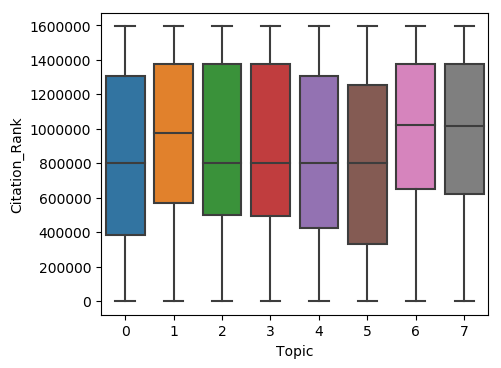

In [28]:
fig=plt.figure(figsize=(5, 4), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.boxplot(x="Topic", y="Citation_Rank", data=topic_df)
#plt.savefig('mpr_internal_h-index.png',bbox_inches='tight')
plt.show()

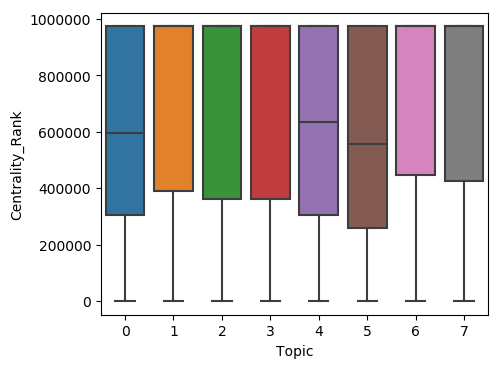

In [30]:
fig=plt.figure(figsize=(5, 4), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.boxplot(x="Topic", y="Centrality_Rank", data=topic_df)
#plt.savefig('mpr_internal_h-index.png',bbox_inches='tight')
plt.show()

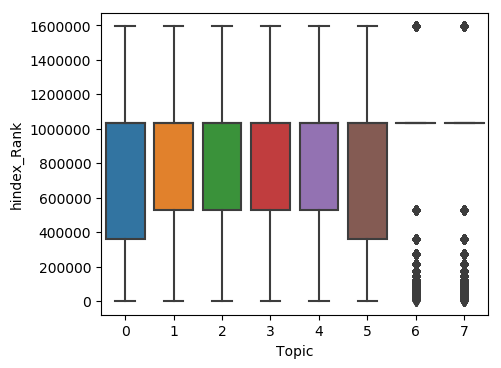

In [31]:
fig=plt.figure(figsize=(5, 4), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.boxplot(x="Topic", y="hindex_Rank", data=topic_df)
#plt.savefig('mpr_internal_h-index.png',bbox_inches='tight')
plt.show()

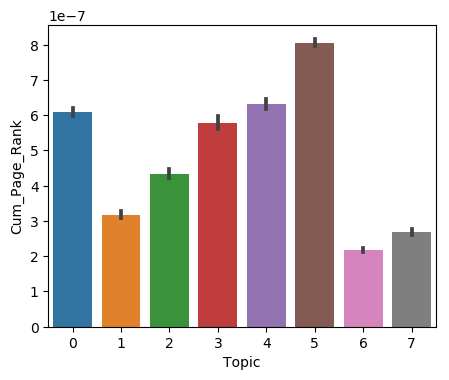

In [33]:
fig=plt.figure(figsize=(5, 4), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.barplot(x="Topic", y="Cum_Page_Rank", data=topic_df)
#plt.savefig('mpr_internal_h-index.png',bbox_inches='tight')
plt.show()

In [ ]:
aa=pd.qcut(list(topic_df['hindex']), 40,duplicates="drop")
values = [i for i in aa.value_counts()]
cats = list(aa.categories)
ncats = []
for i in range(len(cats)):
    ncats.append("({}, {}]".format(float(cats[i].left),float(cats[i].right)))
paper_buckets = pd.DataFrame({'range':ncats,'count':values})
fig=plt.figure(figsize=(12, 2), dpi= 100, facecolor='w', edgecolor='k')
# plt.xlabel('Normalized Indices')
# plt.ylabel('Authors')
plt.title('Count of citations of papers')
ax = sns.barplot(x="Metric_Rank", y="hindex", data=topic_df,palette="Blues_d")
#plt.savefig('citation_count.png',bbox_inches='tight')

### Reach Function

In [ ]:
reach = {}
reach_avg = {}
i=0
for idx,row in df1.iterrows():
    max_reach = 0
    domains = []
    try:
        for k in inlinks[row['id']]:
            domains.append(papers_topic[k])
        current_reach = len(dict(Counter(domains)))
        for auth in row['authors']:
            if auth in reach:
                if reach[auth] < current_reach:
                    reach[auth] = current_reach
            else:
                reach[auth] = current_reach
            if auth in reach_avg:
                reach_avg[auth].append(current_reach)
            else:
                reach_avg[auth] = [current_reach]
        i += 1
        if i%50000 == 0:
            print i
    except Exception as e:
        pass

In [ ]:
avg_reach = {}
for i in reach_avg:
    avg_reach[i] = [reach[i],int(sum(reach_avg[i])/len(reach_avg[i]))]

In [ ]:
#edge list of authors for centrality measures calculation
paper_authors = {}
for idx,row in df1.iterrows():
    paper_authors[row['id']] = row['authors']

In [ ]:
edge_list = []
for idx,row in df1.iterrows():
    authors_b = []
    for ref in row['references']:
        if ref in paper_authors:
            authors_b += paper_authors[ref]
    if len(authors_b) > 0:
        for auth in row['authors']:
            for auth2 in authors_b:
                edge_list.append([auth,auth2])

### Plots

In [ ]:
fig=plt.figure(figsize=(5, 4), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.barplot(x="Cum_Page_Rank", y="Author", hue="hindex", data=fd.sort_values(by=['Metric_Rank']).head(10))
ax.set(xlabel='Scaled Metric Rank', ylabel='Author')
plt.savefig('mpr_internal_h-index.png',bbox_inches='tight')

In [ ]:
aa=pd.qcut(aindexes.values(), 40,duplicates="drop")
values = [i for i in aa.value_counts()]
cats = list(aa.categories)
ncats = []
for i in range(len(cats)):
    ncats.append("{}".format(float(cats[i].right)))
paper_buckets = pd.DataFrame({'range':ncats,'count':values})
fig=plt.figure(figsize=(12, 2), dpi= 100, facecolor='w', edgecolor='k')
# plt.xlabel('Normalized Indices')
# plt.ylabel('Authors')
plt.title('Count of citations of papers separated into buckets')
ax = sns.barplot(x="range", y="count", data=paper_buckets,palette="Blues_d")

In [ ]:
x1 = citations['name']
y1 = citations['h_index']
y1norm = [float(i)/max(y1) for i in y1]
x2 = x1
y2 = citations['i10']
y2norm = [float(i)/max(y2) for i in y2]
fig=plt.figure(figsize=(4, 6), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(y1norm, x1,'b', label = 'actual H index')
plt.plot(y2norm, x2,'g', label = 'actual i10 index')
plt.legend(loc='best')
plt.xlabel('Normalized Indices')
plt.ylabel('Authors')
plt.title('Authors ranked from top to bottom based on total number of citations of the author')

plt.savefig('citations.png',bbox_inches='tight')

In [ ]:
x1 = num_papers['name']
y1 = num_papers['h_index']
y1norm = [float(i)/max(y1) for i in y1]
x2 = x1
y2 = num_papers['i10']
y2norm = [float(i)/max(y2) for i in y2]
fig=plt.figure(figsize=(4, 14), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(y1norm, x1,'b', label = 'actual H index')
plt.plot(y2norm, x2,'g', label = 'actual i10 index')
plt.legend(loc='best')
plt.xlabel('Index')
plt.ylabel('Authors')
plt.title('Authors ranked from top to bottom based on total number of papers published')
plt.savefig('num_papers.png',bbox_inches='tight',figsize=(8, 20), dpi= 400, facecolor='w', edgecolor='k')

In [ ]:
x1 = internal_h['name']
y1 = internal_h['h_index']
y1norm = [float(i)/max(y1) for i in y1]
x2 = x1
y2 = internal_h['i10']
y2norm = [float(i)/max(y2) for i in y2]
fig=plt.figure(figsize=(4, 14), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(y1norm, x1,'b', label = 'actual H index')
plt.plot(y2norm, x2,'g', label = 'actual i10 index')
plt.legend(loc='best')
plt.xlabel('Normalized Indices')
plt.ylabel('Authors')
plt.title('Authors ranked from top to bottom based on internal h-index calculation')
plt.savefig('h-index.png',bbox_inches='tight')

In [ ]:
x1 = internal_i10['name']
y1 = internal_i10['h_index']
y1norm = [float(i)/max(y1) for i in y1]
x2 = x1
y2 = internal_i10['i10']
y2norm = [float(i)/max(y2) for i in y2]
fig=plt.figure(figsize=(4, 11), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(y1norm, x1,'b', label = 'actual H index')
plt.plot(y2norm, x2,'g', label = 'actual i10 index')
plt.legend(loc='best')
plt.xlabel('Normalized Indices')
plt.ylabel('Authors')
plt.title('Authors ranked from top to bottom based on internal i10-index calculation')
plt.savefig('i10-index.png',bbox_inches='tight')

In [ ]:
x1 = internal_a['name']
y1 = internal_a['h_index']
y1norm = [float(i)/max(y1) for i in y1]
x2 = x1
y2 = internal_a['i10']
y2norm = [float(i)/max(y2) for i in y2]
fig=plt.figure(figsize=(4, 8), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(y1norm, x1,'b', label = 'actual H index')
plt.plot(y2norm, x2,'g', label = 'actual i10 index')
plt.legend(loc='best')
plt.xlabel('Normalized indices')
plt.ylabel('Authors')
plt.title('Authors ranked from top to bottom based on internal a-index calculation')
plt.savefig('a-index.png',bbox_inches='tight')

In [ ]:
x1 = mpr['name']
y1 = mpr['h_index']
y1norm = [float(i)/max(y1) for i in y1]
x2 = x1
y2 = mpr['i10']
y2norm = [float(i)/max(y2) for i in y2]
fig=plt.figure(figsize=(4, 9), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(y1norm, x1,'b', label = 'actual H index')
plt.plot(y2norm, x2,'g', label = 'actual i10 index')
plt.legend(loc='best')
plt.xlabel('Normalized Indices')
plt.ylabel('Authors')
plt.title('Authors ranked from top to bottom based on the modified page-rank algorithm')
plt.savefig('mpr-index.png',bbox_inches='tight')

### Centrality Measures

In [ ]:
import csv
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
G=nx.DiGraph()
P=[]
with io.open('authors_edges.json',encoding='utf-8') as ff:
    P=json.load(ff)
G.add_edges_from(P)

In [ ]:
eigen_dict=nx.eigenvector_centrality_numpy(G)

In [ ]:
nx.density(G)

In [ ]:
nx.number_strongly_connected_components(G)

In [ ]:
dict_ebc=nx.edge_betweenness_centrality(G)

In [ ]:
nx.global_reaching_centrality(G)

In [ ]:
indeg=nx.in_degree_centrality(G)
sorted(indeg.iteritems(), key=lambda (k,v): v, reverse=True)

In [ ]:
outdeg=nx.out_degree_centrality(G)

In [ ]:
betc=nx.betweenness_centrality(G)

In [ ]:
mydic={}
for item in list(G):
    mydic[item]=nx.local_reaching_centrality(G,item)

In [ ]:
phi = (1 + math.sqrt(5)) / 2.0  # largest eigenvalue of adj matrix
centrality = nx.katz_centrality_numpy(G, 1/phi)
for n, c in sorted(centrality.items()):
    print(n, c)

In [ ]:
with open('katz.csv', 'wb') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in centrality.items():
       writer.writerow([key, value])